# Word2Vec모델을 이용해 의원들을 벡터화해서 공간안에 그려보자

In [6]:
import numpy as np
import json
import pandas as pd
import gensim

In [12]:
word2vecmodel = gensim.models.Word2Vec.load('./word2vecmodel')
ldamodel = gensim.models.ldamodel.LdaModel.load('./ldamodel')

In [13]:
member = pd.read_json('./member.json')
vector = []
member_vec = {}
for row in member.iterrows():
    name = row[1]['name']
    party = row[1]['party']
    try :
        v = word2vecmodel.wv[name]
    except :
        continue
    
    vector.append(v)
    member_vec.setdefault(name,[])
    if len(member_vec[name]) ==0 :
        member_vec[name].append(party)

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib as mpl

In [15]:
pca = PCA(n_components=2)
pca.fit(vector)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
for name in member_vec.keys():
    member_vec[name].append(pca.transform(word2vecmodel.wv[name]))

In [17]:
member_vec['강기윤'][1]

array([[-0.91876216, -0.64524011]])

In [19]:
X=[]
Y=[]
Name=[]
for name in member_vec.keys():
    X.append(member_vec[name][1][0][0])
    Y.append(member_vec[name][1][0][1])
    Name.append([name,member_vec[name][0]])

In [20]:
font_name = mpl.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
mpl.rc('font', family=font_name)

In [21]:
progress = set([1,2,3,4]) #진보 1,2,3,4
conser = set([0,5,6]) #보수 0,5,6

# 결과가 흥미롭게 잘 나왔다. 진보, 보수 별로 그룹을 형성하고있다.

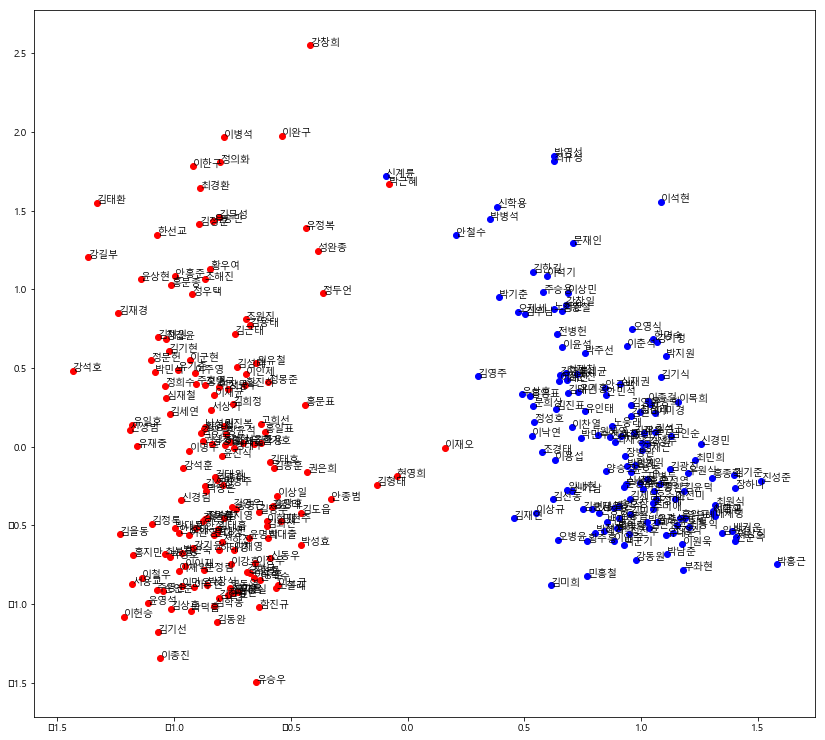

In [22]:
fig, ax = plt.subplots(figsize =(14,13))

ax.scatter(X, Y,s=10)
    
for i, txt in enumerate(Name):
    if txt[1] in progress :
         ax.scatter(X[i], Y[i], c=["b"])
    if txt[1] in conser:
         ax.scatter(X[i], Y[i], c=["r"])
            
    ax.annotate(str(txt[0]), (X[i],Y[i]))
plt.show()